In [87]:
import numpy as np
def ReadIntoNpArray(filename):
    p=[]
    with open(filename) as f:
        for line in f:
            data = line.split()
            tmp=[]
            for item in data:
                tmp.append(float(item))
            p.append(tmp)
        return np.asarray(p)    
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def plotVoro(p):
    vor = Voronoi(p, incremental=True)
    voronoi_plot_2d(vor,show_points=True,show_vertices=False,line_alpha=0.5,line_colors='red')
    plt.show()
    
def returnVoro(p):
    vor = Voronoi(p, incremental=True)
    return voronoi_plot_2d(vor,show_points=True,show_vertices=False,line_alpha=0.5,line_colors='red')
    
from __future__ import division, print_function, absolute_import

import numpy as np
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def _adjust_bounds(ax, points):
    ptp_bound = points.ptp(axis=0)
    ax.set_xlim(points[:,0].min() - 0.1*ptp_bound[0],
                points[:,0].max() + 0.1*ptp_bound[0])
    ax.set_ylim(points[:,1].min() - 0.1*ptp_bound[1],
                points[:,1].max() + 0.1*ptp_bound[1])

def voronoi_plot_2d_rew(vor, **kw):
    from matplotlib.collections import LineCollection
    if vor.points.shape[1] != 2:
        raise ValueError("Voronoi diagram is not 2-D")
    line_colors = kw.get('line_colors', 'k')
    line_width = kw.get('line_width', 1.0)
    line_alpha = kw.get('line_alpha', 1.0)
    line_segments = []
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            line_segments.append([(x, y) for x, y in vor.vertices[simplex]])
    lcS = LineCollection(line_segments,
                        colors=line_colors,
                        lw=line_width,
                        linestyle='solid')
    lcS.set_alpha(line_alpha)   
    ptp_bound = vor.points.ptp(axis=0)
    line_segments = []
    center = vor.points.mean(axis=0)
    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
        simplex = np.asarray(simplex)
        if np.any(simplex < 0):
            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
            t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[pointidx].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[i] + direction * ptp_bound.max()
            line_segments.append([(vor.vertices[i, 0], vor.vertices[i, 1]),
                                  (far_point[0], far_point[1])])
    lcD = LineCollection(line_segments,
                        colors=line_colors,
                        lw=line_width,
                        linestyle='dashed')
    lcD.set_alpha(line_alpha)       
    return lcS,lcD,vor,

def animate(im):
    ax = fig.gca()
    ax.cla()
    ax.add_collection(im[0])
    ax.add_collection(im[1])# update the data
    vor=im[2]
    #next line plot vertices
    #ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o')
    #next line plot points
    ax.plot(vor.points[:,0], vor.points[:,1], '.')
    _adjust_bounds(ax,np.concatenate((vor.points, np.array([[0,0],[1,1]])), axis=0))
    return ax.figure,

In [119]:

def fileIntoDataSet(typename="psitxt",folder="./data/"):
    import os
    listfile=os.listdir(folder)
    listnum=[]
    for datafile in listfile:
        if(datafile.split()[0]==typename):
            listnum.append(int(datafile.split()[1]))
    listnum.sort()
    PlotDataSet=[]
    for num in listnum:
        name='{:6s} {:6d}'.format(typename, num)
        PlotDataSet.append(ReadIntoNpArray(folder+name))
    return PlotDataSet
    
    
########################################  


def GenerateGIF(PlotDataSet=PlotDataSetPsi,saveName='PFC64.gif'):

    fig = plt.figure()

    ims = []

    for plotData in PlotDataSet:
        vor=Voronoi(plotData, incremental=True)
        ims.append(voronoi_plot_2d_rew(vor,show_points=True,show_vertices=True,line_alpha=0.5,line_colors='red'))

    ani = animation.FuncAnimation(fig, animate, ims,interval=80, blit=True)
    ani.save(saveName, dpi=80, writer='imagemagick')
    plt.show()


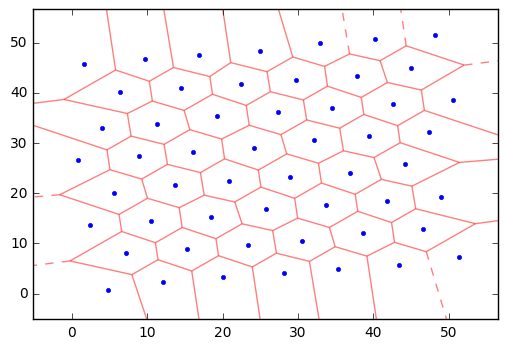

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import Voronoi
PlotDataSetPsi=fileIntoDataSet()
PlotDataSetPhi=fileIntoDataSet('phitxt')


fig = plt.figure()
ims = []
for plotData in PlotDataSetPsi:
    vor=Voronoi(plotData, incremental=True)
    ims.append(voronoi_plot_2d_rew(vor,show_points=True,show_vertices=True,line_alpha=0.5,line_colors='red'))
ani = animation.FuncAnimation(fig, animate, ims,interval=80, blit=True)
ani.save("PFC64_psi.gif", dpi=80, writer='imagemagick')
plt.show()
fig.clf()

ims = []
for plotData in PlotDataSetPhi:
    vor=Voronoi(plotData, incremental=True)
    ims.append(voronoi_plot_2d_rew(vor,show_points=True,show_vertices=True,line_alpha=0.5,line_colors='red'))
ani = animation.FuncAnimation(fig, animate, ims,interval=80, blit=True)
ani.save("PFC64_phi.gif", dpi=80, writer='imagemagick')
plt.show()
fig.clf()

In [ ]:
fig.clf()